# 6.3 Exercise Geographical Visualizations 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Wrangle data (Step 5)
#### 3. Conduct consistency checks (Step 6)
#### 4. Create a choropleth map (Step 7)
#### 5. Export data

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6/us-states.json'

In [4]:
# Show JSON file contents

f = open(r'C:\Users\jomok\Documents\Career Foundry\Achievement 6/us-states.json',)
  
# Returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Define path

path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [6]:
# Import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FHL_bank_data_merged.pkl'))

In [7]:
df.head()

,County,State Code,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Borrower Count,Borrower 1 Race Type,Borrower 1 Age,Borrower 2 Age,...,Borrower 1 Race,Borrower 2 Race,Borrower 1 Gender,Borrower 2 Gender,Property Usage,Property Type,Loan Count,Monthly Income Range,Age Range,Note Rate Percent Range
0,Chittenden,50,Vermont,2019,2407198,7308,1,5,34.0,44.0,...,White,No Co-Borrower,Female,No Co-Borrower,Principal Residence,Single family detached,1,"5,000 - 11,999",Under 35,4 - 4.99%
1,Chittenden,50,Vermont,2019,2407199,7416,2,5,36.0,33.0,...,White,White,Female,Male,Principal Residence,Single family detached,1,"5,000 - 11,999",35 - 44,4 - 4.99%
2,Lamoille,50,Vermont,2019,2407200,5143,2,5,34.0,36.0,...,White,White,Male,Female,Principal Residence,Single family detached,1,"5,000 - 11,999",Under 35,4 - 4.99%
3,Orange,50,Vermont,2019,2407201,8866,2,5,42.0,43.0,...,White,White,Male,Female,Principal Residence,Single family detached,1,"5,000 - 11,999",35 - 44,4 - 4.99%
4,York,23,Maine,2019,2407202,15240,1,5,66.0,44.0,...,White,No Co-Borrower,Female,No Co-Borrower,Principal Residence,Single family detached,1,"12,000+",65+,4 - 4.99%


In [8]:
df.shape

(101205, 29)

### 2. Wrangle data (Step 5)

In [9]:
df.columns

Index(['County', 'State Code', 'State', 'Year', 'LoanCharacteristicsID',
       'Total Monthly Income Amount', 'Borrower Count', 'Borrower 1 Race Type',
       'Borrower 1 Age', 'Borrower 2 Age', 'Property Unit Count',
       'Note Rate Percent', 'Note Amount', 'Total Debt Expense Ratio Percent',
       'Borrower 1 Credit Score Value', 'Borrower 2 Credit Score Value',
       'Loan Purpose', 'Mortgage Type', 'First Time Homebuyer',
       'Borrower 1 Race', 'Borrower 2 Race', 'Borrower 1 Gender',
       'Borrower 2 Gender', 'Property Usage', 'Property Type', 'Loan Count',
       'Monthly Income Range', 'Age Range', 'Note Rate Percent Range'],
      dtype='object')

In [10]:
# Create a subset of columns excluding Borrower 2 variables

df_borr1 = df[['County', 'State', 'Year', 'LoanCharacteristicsID', 'Total Monthly Income Amount', 'Monthly Income Range', 'Borrower 1 Age', 'Age Range', 'Borrower 1 Race', 'Borrower 1 Gender', 'Borrower 1 Credit Score Value', 'Property Unit Count', 'Note Rate Percent', 'Note Rate Percent Range', 'Note Amount', 'Total Debt Expense Ratio Percent', 'Loan Purpose', 'Mortgage Type', 'First Time Homebuyer', 'Property Usage', 'Property Type', 'Loan Count', 'Borrower Count']]

In [11]:
# Check output

df_borr1.head()

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Monthly Income Range,Borrower 1 Age,Age Range,Borrower 1 Race,Borrower 1 Gender,...,Note Rate Percent Range,Note Amount,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count
0,Chittenden,Vermont,2019,2407198,7308,"5,000 - 11,999",34.0,Under 35,White,Female,...,4 - 4.99%,319113,40.46,Purchase,FHA,Yes,Principal Residence,Single family detached,1,1
1,Chittenden,Vermont,2019,2407199,7416,"5,000 - 11,999",36.0,35 - 44,White,Female,...,4 - 4.99%,248005,45.67,Purchase,FHA,No,Principal Residence,Single family detached,1,2
2,Lamoille,Vermont,2019,2407200,5143,"5,000 - 11,999",34.0,Under 35,White,Male,...,4 - 4.99%,211105,46.23,Purchase,FHA,No,Principal Residence,Single family detached,1,2
3,Orange,Vermont,2019,2407201,8866,"5,000 - 11,999",42.0,35 - 44,White,Male,...,4 - 4.99%,210000,36.88,Purchase,VA,No,Principal Residence,Single family detached,1,2
4,York,Maine,2019,2407202,15240,"12,000+",66.0,65+,White,Female,...,4 - 4.99%,233200,34.95,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1


In [12]:
# Check shape

df_borr1.shape

(101205, 23)

In [13]:
# Check values of "State" column

df_borr1['State'].value_counts(dropna = False)

Illinois                10563
Wisconsin               10338
Ohio                     7286
Kansas                   6817
Texas                    6675
Iowa                     6088
Indiana                  5492
Pennsylvania             4626
Missouri                 4592
Minnesota                3891
Nebraska                 3861
Michigan                 3688
Colorado                 2501
New York                 1875
Kentucky                 1571
Oklahoma                 1505
Massachusetts            1441
California               1393
Virginia                 1361
Florida                  1302
Tennessee                1228
South Dakota             1182
Arkansas                 1074
Idaho                    1033
North Carolina            830
Oregon                    805
Maryland                  724
New Jersey                718
Georgia                   669
Louisiana                 603
Alabama                   549
Arizona                   523
West Virginia             476
New Mexico

In [14]:
# Check dataframe basic information

df_borr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101205 entries, 0 to 101204
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   County                            101202 non-null  object 
 1   State                             101202 non-null  object 
 2   Year                              101205 non-null  object 
 3   LoanCharacteristicsID             101205 non-null  object 
 4   Total Monthly Income Amount       101205 non-null  int64  
 5   Monthly Income Range              101205 non-null  object 
 6   Borrower 1 Age                    101205 non-null  float64
 7   Age Range                         101205 non-null  object 
 8   Borrower 1 Race                   101205 non-null  object 
 9   Borrower 1 Gender                 101205 non-null  object 
 10  Borrower 1 Credit Score Value     101205 non-null  int64  
 11  Property Unit Count               101205 non-null  i

Wrangling previously done in Exercise 6.1

### 3. Conduct consistency checks (Step 6)

##### Missing values check

In [15]:
# Check for missing values

df_borr1.isnull().sum()

County                              3
State                               3
Year                                0
LoanCharacteristicsID               0
Total Monthly Income Amount         0
Monthly Income Range                0
Borrower 1 Age                      0
Age Range                           0
Borrower 1 Race                     0
Borrower 1 Gender                   0
Borrower 1 Credit Score Value       0
Property Unit Count                 0
Note Rate Percent                   0
Note Rate Percent Range             0
Note Amount                         0
Total Debt Expense Ratio Percent    0
Loan Purpose                        0
Mortgage Type                       0
First Time Homebuyer                0
Property Usage                      0
Property Type                       0
Loan Count                          0
Borrower Count                      0
dtype: int64

In [16]:
df_nan = df_borr1[df_borr1['State'].isnull() == True]

In [17]:
df_nan

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Monthly Income Range,Borrower 1 Age,Age Range,Borrower 1 Race,Borrower 1 Gender,...,Note Rate Percent Range,Note Amount,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count
22898,NaN,NaN,2019,2434527,9816,"5,000 - 11,999",42.0,35 - 44,Asian,Female,...,4 - 4.99%,368000,38.17,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1
24411,NaN,NaN,2019,2455128,10283,"5,000 - 11,999",28.0,Under 35,White,Male,...,3 - 3.99%,304000,23.82,Purchase,Conventional,No,Principal Residence,Single family detached,1,2
100469,NaN,NaN,2022,2737714,11539,"5,000 - 11,999",41.0,35 - 44,White,Female,...,6%+,162000,28.18,Purchase,Conventional,No,Second Home,Single family detached,1,2


In [18]:
# Create a dataframe without the missing values

df_borr1_clean = df_borr1[df_borr1['State'].isnull() == False]

In [19]:
df_borr1_clean.shape

(101202, 23)

Confirmed expected shape: Original shape 269781 less the 15 rows of missing data = 269766

##### Duplicates check

In [20]:
# Check for duplicates

dups = df_borr1_clean.duplicated()

In [21]:
dups.shape

(101202,)

No duplicates

##### Extreme values checks

<Axes: xlabel='Borrower 1 Age', ylabel='Count'>

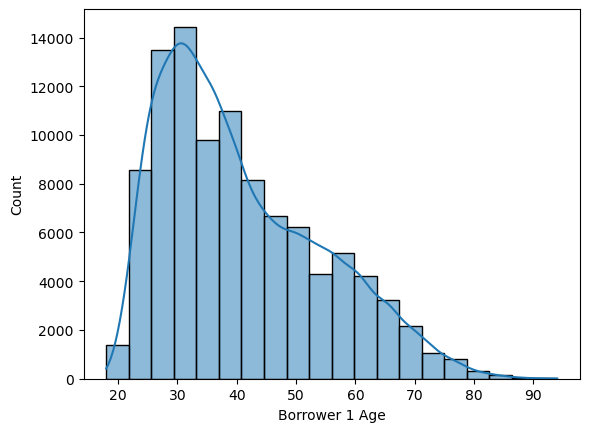

In [22]:
# Check for extreme values for 'Borrower 1 Age'

sns.histplot(df_borr1_clean['Borrower 1 Age'], bins=20, kde = True) 

<Axes: xlabel='Note Rate Percent', ylabel='Count'>

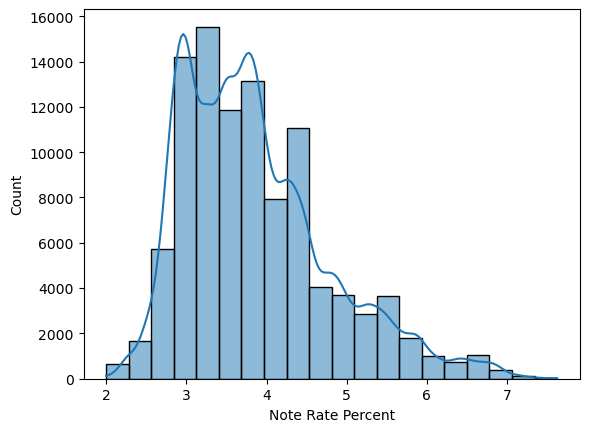

In [23]:
# Check for extreme values for 'Note Rate Percent'

sns.histplot(df_borr1_clean['Note Rate Percent'], bins=20, kde = True) 

<Axes: xlabel='Note Amount', ylabel='Count'>

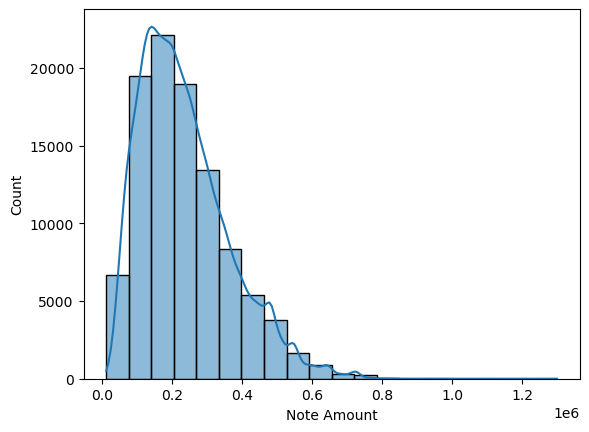

In [24]:
# Check for extreme values for 'Note Amount'

sns.histplot(df_borr1_clean['Note Amount'], bins=20, kde = True) 

<Axes: xlabel='Total Debt Expense Ratio Percent', ylabel='Count'>

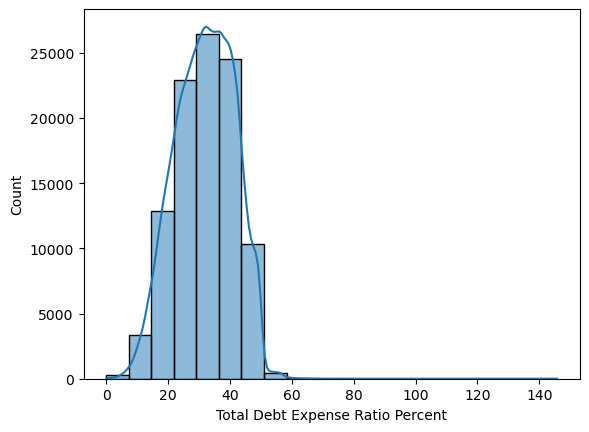

In [25]:
# Check for extreme values for 'Total Debt Expense Ratio Percent'

sns.histplot(df_borr1_clean['Total Debt Expense Ratio Percent'], bins=20, kde = True) 

Debt Expense Ratio over 100% may not be good, but may be accurate, so I'm hesistant to remove those records.

<Axes: xlabel='Borrower 1 Credit Score Value', ylabel='Count'>

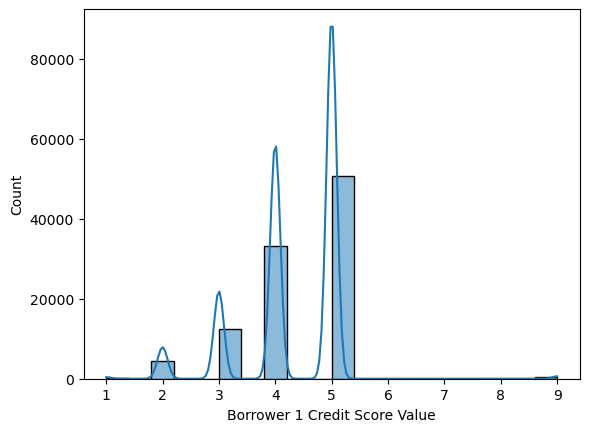

In [26]:
# Check for extreme values for 'Borrower 1 Credit Score Value'

sns.histplot(df_borr1_clean['Borrower 1 Credit Score Value'], bins=20, kde = True) 

No values removed

### 4. Create a choropleth map (Step 7)

In [27]:
# Create a data frame with just the states and the values for the note amount 

data_to_plot = df_borr1_clean[['State','Note Amount']]
data_to_plot.head()

,State,Note Amount
0,Vermont,319113
1,Vermont,248005
2,Vermont,211105
3,Vermont,210000
4,Maine,233200


In [28]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Note Amount'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Amount").add_to(map)
folium.LayerControl().add_to(map)

map

In [29]:
# Save map

map.save('plot_data1.html')

In [30]:
# Aggregate loan count by state

df_borr1_clean['Total Loan Count per State'] = df_borr1_clean.groupby(['State'])['Loan Count'].transform(np.sum)

C:\Users\jomok\AppData\Local\Temp\ipykernel_21780\4250815870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borr1_clean['Total Loan Count per State'] = df_borr1_clean.groupby(['State'])['Loan Count'].transform(np.sum)


In [31]:
# Aggregate max note amount by state

df_borr1_clean['Max Note Amount per State'] = df_borr1_clean.groupby(['State'])['Note Amount'].transform(np.max)

C:\Users\jomok\AppData\Local\Temp\ipykernel_21780\4284042949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borr1_clean['Max Note Amount per State'] = df_borr1_clean.groupby(['State'])['Note Amount'].transform(np.max)


In [32]:
# Check Output

df_borr1_clean.head(20)

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Monthly Income Range,Borrower 1 Age,Age Range,Borrower 1 Race,Borrower 1 Gender,...,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State
0,Chittenden,Vermont,2019,2407198,7308,"5,000 - 11,999",34.0,Under 35,White,Female,...,40.46,Purchase,FHA,Yes,Principal Residence,Single family detached,1,1,332,547560
1,Chittenden,Vermont,2019,2407199,7416,"5,000 - 11,999",36.0,35 - 44,White,Female,...,45.67,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
2,Lamoille,Vermont,2019,2407200,5143,"5,000 - 11,999",34.0,Under 35,White,Male,...,46.23,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
3,Orange,Vermont,2019,2407201,8866,"5,000 - 11,999",42.0,35 - 44,White,Male,...,36.88,Purchase,VA,No,Principal Residence,Single family detached,1,2,332,547560
4,York,Maine,2019,2407202,15240,"12,000+",66.0,65+,White,Female,...,34.95,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1,229,575000
5,York,Maine,2019,2407203,5424,"5,000 - 11,999",23.0,Under 35,White,Male,...,42.04,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,2,229,575000
6,Middlesex,Massachusetts,2019,2407205,10165,"5,000 - 11,999",48.0,45 - 54,White,Female,...,39.82,Purchase,Conventional,Yes,Principal Residence,Low-rise condo,1,1,1441,828700
7,Plymouth,Massachusetts,2019,2407208,9678,"5,000 - 11,999",33.0,Under 35,White,Male,...,34.49,Purchase,Conventional,No,Principal Residence,Low-rise condo,1,2,1441,828700
8,Norfolk,Massachusetts,2019,2407209,7565,"5,000 - 11,999",30.0,Under 35,White,Male,...,43.24,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,3,1441,828700
9,Norfolk,Massachusetts,2019,2407210,11416,"5,000 - 11,999",44.0,35 - 44,White,Female,...,39.57,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,2,1441,828700


In [33]:
# Create a data frame with just the states and the values for the max note amount 

data_to_plot2 = df_borr1_clean[['State','Max Note Amount per State']]
data_to_plot2.head()

,State,Max Note Amount per State
0,Vermont,547560
1,Vermont,547560
2,Vermont,547560
3,Vermont,547560
4,Maine,575000


In [34]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State', 'Max Note Amount per State'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Max Amount").add_to(map)
folium.LayerControl().add_to(map)

map

In [35]:
# Save map

map.save('plot_data2.html')

In [36]:
df_borr1_clean.groupby('State').agg({'Loan Count': ['sum']})

,Loan Count
,sum
State,
Alabama,549
Alaska,7
Arizona,523
Arkansas,1074
California,1393
Colorado,2501
Connecticut,335
Delaware,141


In [37]:
# Create a data frame with just the states and the values for the total loan count

data_to_plot3 = df_borr1_clean[['State','Total Loan Count per State']]
data_to_plot3.head()

,State,Total Loan Count per State
0,Vermont,332
1,Vermont,332
2,Vermont,332
3,Vermont,332
4,Maine,229


In [38]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot3,
    columns = ['State', 'Total Loan Count per State'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Count").add_to(map)
folium.LayerControl().add_to(map)

map

In [39]:
# Save map

map.save('plot_data3.html')

Step 8 - Discuss the results and what they mean in a markdown section:  Darkest shades of orange for Note Amount in North Carolina and Oregon; Darkest shade of red for Max Note Amount in California; Darkest shade of red for Total Loan Count in Wisconsin and then Darkest shade of orange in Illinois and Ohio.

Does the analysis answer any of your existing research questions?  Yes.

QUESTION:  Which top demographic groups are buying houses in recent years?  Analysis shows top states where homes are being bought, based upon Loan Count (Wisconsin, being the top state, followed by Illinois and Ohio; need to see also counts by demographic groups.

QUESTION:  Are the top demographic groups buying houses the same in each state?  Analysis shows that home purchases are not the same in each state.

Does the analysis lead you to any new research questions?  Yes.

Analysis lead me to question states for max note amounts and also I would like to see max note amounts by demographics.

### 5. Export data

In [40]:
# Export combined data as a pickle file

df_borr1_clean.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_data_borr1_clean.pkl'))

In [41]:
# Export combined data as a csv file

df_borr1_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_data_borr1_clean.csv'))

In [42]:
df3 = df_borr1_clean.groupby(['Year', 'State']).agg({'Total Monthly Income Amount': ['mean', 'median']})

In [43]:
df3.head()

Total Monthly Income Amount         
                                       mean   median
Year State                                          
2019 Alabama                   12487.991071   9237.5
     Alaska                    18334.666667  17333.0
     Arizona                   12459.431310   9167.0
     Arkansas                  10080.330357   8694.0
     California                13941.699650  12033.5

In [44]:
# Export aggregate state summary data as a csv file

df3.to_csv(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_data_state_summary.csv'))

In [46]:
df4 = df_borr1_clean.groupby('Year').agg({'Total Monthly Income Amount': ['mean', 'median']})

In [47]:
df4.head()

Total Monthly Income Amount        
                            mean  median
Year                                    
2019                 9542.216138  7937.0
2020                 8635.992822  7004.0
2021                 9501.891338  7454.0
2022                10530.607993  8570.0

In [48]:
# Export aggregate year summary data as a csv file

df4.to_csv(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_data_year_summary.csv'))